In [81]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# necessary imports

In [82]:
df = pd.read_csv(r"C:\Users\rache\linear_models_assignment\data\heart_hw.csv")

In [83]:
df.head(100)

,Unnamed: 0,age,transplant,y
0,1,53,control,0
1,2,43,control,0
2,3,52,control,0
3,4,52,control,0
4,5,54,control,0
...,...,...,...,...
95,96,36,treatment,1
96,97,45,treatment,1
97,98,53,treatment,0
98,99,30,control,1


In [84]:
#Question 3 Part 1a
n=103

prop = df[df['transplant'] == 'control']
a=(df['y'] == 1).sum() / len(prop)
print(a)

#The proportion of people who survive in the control group who do not receive a transplant: 0.82


0.8235294117647058


In [85]:
#Part 3 Question 1b

treat=df[df['transplant']=='treatment']
b=(df['y'] == 1).sum() / len(treat)
print(a-b)

# the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group: 0.4177

0.41773231031543046


In [86]:
# Part 3 Question 2

df['transplant'] = df['transplant'].replace({'control': 0, 'treatment': 1})

x=df['transplant']
y=df['y']

def slr(x,y): 
    """ Single linear regression function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x-x_bar)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1})

C:\Users\rache\AppData\Local\Temp\ipykernel_29944\2766940871.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transplant'] = df['transplant'].replace({'control': 0, 'treatment': 1})


In [7]:
# Part 3 Question 2

print(slr(x,y))

# The comparison between part 1 and part 2: part 1 shows the treatment differences while part two is more the statistical calculations for the equation of the regression line; part 2 numbers are much lower; part 1 shows there are different proportions of people who got the transplant and lived/died and people who didn't get the transplant and who lived/survived. Part 2 calculuates coefficients for the regression equation, so we can investigate the difference in proportions in more depth (0.117+0.23x=y_hat).

{'b0': np.float64(0.11764705882352941), 'b1': np.float64(0.23017902813299232)}


In [87]:
# Part 3 Question 3

def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})




X = df.loc[:,['age','transplant'] ]
y = df['y']
reg = mlr(X,y)
print('MLR coefficients: ', reg['b']) # Same values!

# The intercept here is 0.00056016, which is smaller than our intercept we just calculated above of 0.12. This is because this model is MLR, while the previous model is a Simple Linear Model. The MLR takes into account age and transplant while the simple model just takes into account transplant. This shows that age has an impact on transplant survivals for the groups.

MLR coefficients:  [0.00056016 0.32235086]


In [88]:
# Part 3 Question 4

y = df['y']
df['age*2'] = df['age']**2
df['transplant*2'] = df['transplant']**2
df['(Intercept)'] = 1
vars = ['(Intercept)','age','transplant','age*2']
X = df.loc[:,vars]
X.head()

,(Intercept),age,transplant,age*2
0,1,53,0,2809
1,1,43,0,1849
2,1,52,0,2704
3,1,52,0,2704
4,1,54,0,2916


In [95]:
# Part 3 

y = df['y']
df['age*2'] = df['age']**2
df['transplant x age'] = df['transplant'] * df['age']
vars=['age', 'age*2', 'transplant', 'transplant x age']
X = df.loc[:,vars]
print(X.head())
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, # Feature and target variables
                                                    test_size=.2, # Split the sample 80 train/ 20 test
                                                    random_state=65) # For replication purposes

   age  age*2  transplant  transplant x age
0   53   2809           0                 0
1   43   1849           0                 0
2   52   2704           0                 0
3   52   2704           0                 0
4   54   2916           0                 0


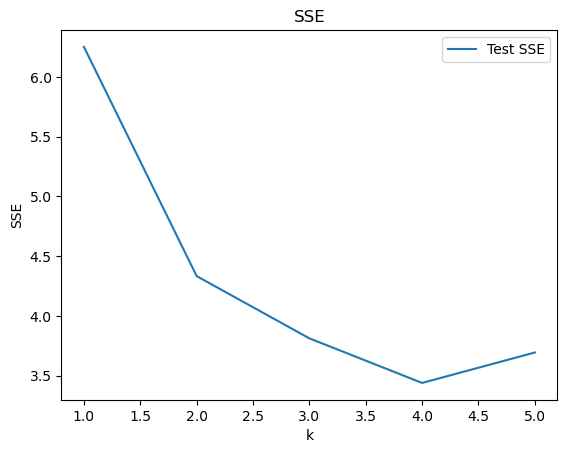

In [34]:
# Part 3 Question 4 | Finding optimal K/Validating our Data

from sklearn.neighbors import KNeighborsRegressor


k_bar = [1,2,3,4,5] # List of k's to try
SSE = [] # Where we store the SSE  
SSE_on_train = [] # save the training error

for k in k_bar:
    model = KNeighborsRegressor(n_neighbors=k+1) # Create a sk model for k
    fitted_model = model.fit(X_train,y_train) # Train the model on our data
    y_hat = fitted_model.predict(X_test) # Predict values for test set
    SSE.append(np.sum( (y_test-y_hat)**2 )) # Save the computed SSE for test set
    y_hat = fitted_model.predict(X_train) # Predict values for training set
    SSE_on_train.append( np.sum( (y_train-y_hat)**2 ) ) # Save the computed SSE


plt.plot(k_bar,SSE,label='Test SSE') # Plot SSE by k
plt.xlabel("k")
plt.ylabel("SSE")
plt.legend(loc='upper right')
plt.title('SSE')
plt.show()

# Validating our model, the best model is where k=2. 

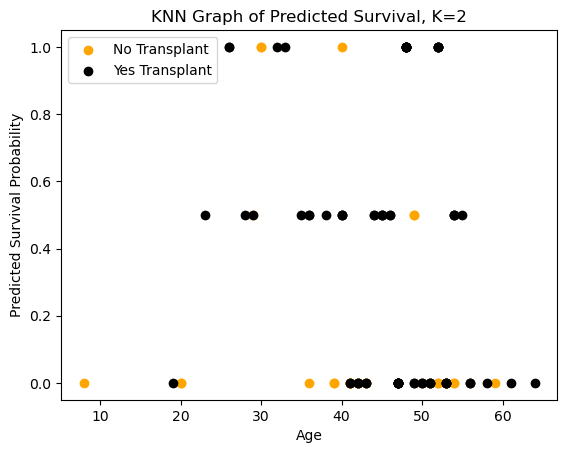

In [102]:
# Part 3 Question 4 | Making our Scatterplot

# Fit KNN with optimal k
from sklearn.neighbors import KNeighborsRegressor
k_optimal = 2
model = KNeighborsRegressor(n_neighbors=k_optimal)
model.fit(X_train, y_train)

X_0 = X[X['transplant'].isin([0])]
pred_no = model.predict(X_0)

#https://www.askpython.com/python/examples/python-predict-function
# conditional on if they are in a transplant group or not

X_1 = X[X['transplant'].isin([1])]
pred_yes = model.predict(X_1)



ages_0 = X['age'][X['transplant'].isin([0])]
ages_1 = X['age'][X['transplant'].isin([1])]

# Used to plot predicted vs. actual outcomes, need x-axis aligned (I was missing this part of my code so AI refined it for me)
# https://www.geeksforgeeks.org/python/selecting-rows-in-pandas-dataframe-based-on-conditions/?utm_source=chatgpt.com

# Plot
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(ages_0, pred_no, color='orange', label='No Transplant')
plt.scatter(ages_1, pred_yes, color='black', label='Yes Transplant')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('KNN Graph of Predicted Survival, K=2')
plt.legend()
plt.show()

#https://www.geeksforgeeks.org/python/matplotlib-pyplot-scatter-in-python/

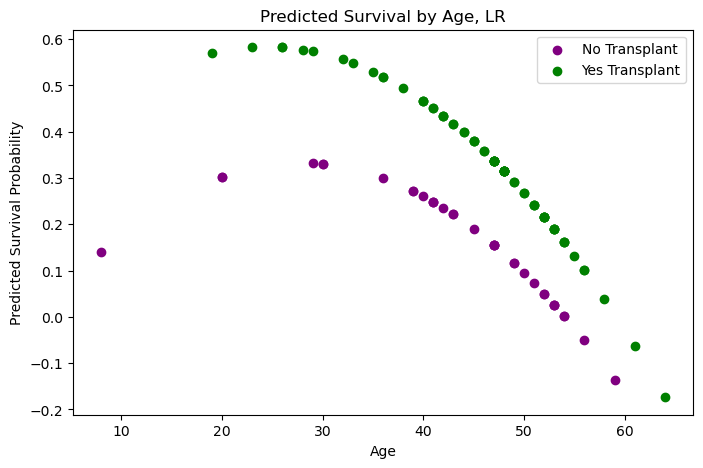

In [103]:

# Fit linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression() #from notes
reg.fit(X_train, y_train)


X_no = X[X['transplant'].isin([0])]
pred_no = reg.predict(X_no)

#https://www.askpython.com/python/examples/python-predict-function


X_yes = X[X['transplant'].isin([1])]
pred_yes = reg.predict(X_yes)


# Corresponding ages
ages_0 = X['age'][X['transplant'].isin([0])]
ages_1 = X['age'][X['transplant'].isin([1])]

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(ages_0, pred_no, color='purple', label='No Transplant')
plt.scatter(ages_1, pred_yes, color='green', label='Yes Transplant')
plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival by Age, LR')
plt.legend()
plt.show()

# I was a bit confused on how to get curves with nonlinear regression, so the plot above is my final answer but this is the only way I could get curves in my graph.

Rsq:  0.16172609622810552
Partial R^2:  0.06254411228023982


[Text(0.5, 1.0, 'Scatterplot of Residuals')]

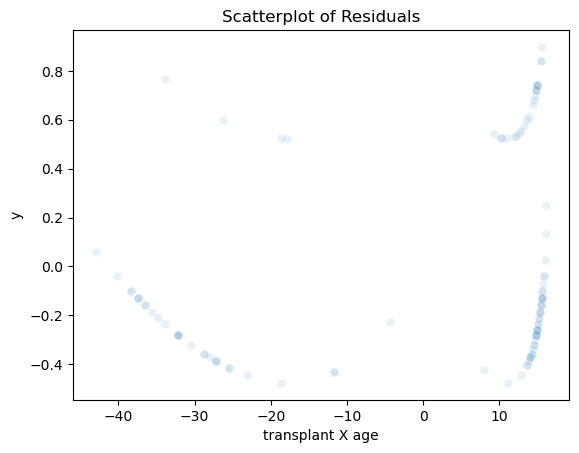

In [59]:
from sklearn.linear_model import LinearRegression # Import linear regression model
df1 = df # Let's start over, again
y = df['y'] # Target variable
df['transplant X age'] = df['transplant']*df['age'] # Interaction term
X_n = df.loc[:,['age','age*2', 'transplant X age']]
X = X_n
reg = LinearRegression(fit_intercept=True).fit(X, y) # Fit the linear model
print('Rsq: ', reg.score(X,y) )

#'mileage_ihs', 'age_ihs', 'mileage_ihs X age_ihs'

var =  'transplant X age' #'mileage_ihs X age_ihs'
x_k = X[var]
X_mk = X.drop(var,axis=1)

## 1. Regress y on x\k, save residual r_y
reg_y = LinearRegression(fit_intercept=False).fit(X_mk, y) # Fit the linear model
r_y = y - reg_y.predict(X_mk)

## 2. Regress x_k on x\k, save residual r_x
reg_k = LinearRegression(fit_intercept=False).fit(X_mk, x_k) # Fit the linear model
r_x = x_k - reg_k.predict(X_mk)

## 3. Plot r_y against r_k
reg = LinearRegression().fit(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy())
print('Partial R^2: ', reg.score(r_x.to_numpy().reshape(-1, 1),r_y.to_numpy()) )
sns.scatterplot(y=r_y, x=r_x,alpha=.1).set(title='Scatterplot of Residuals')

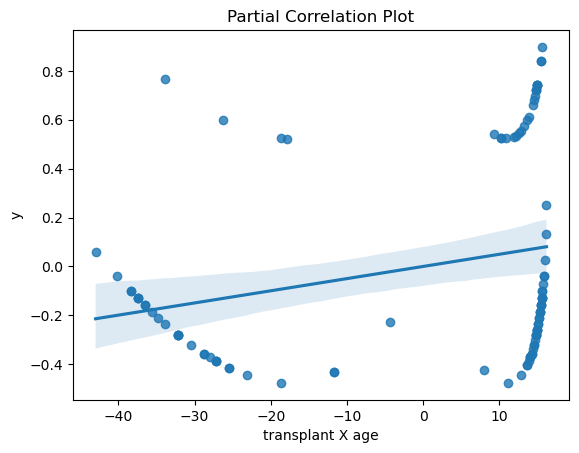

In [60]:
sns.regplot(y=r_y, x=r_x).set(title='Partial Correlation Plot')
plt.show()

In [ ]:
# these are residual graphs in case we need them

# Part 2 Question 5:
# I would be concerned because as age goes up, it seems that probability of survival goes down in both groups a significant amount. Our graph is also choppy, which could indicate an issue with your model, so I don't think it is the best model to use when targeting a variable as important as survival rates. 